In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

In [2]:
# Read the data
data = pd.read_csv('cleaned_data.csv')

data

,time,latitude,longitude,thetao,so,uo,vo,wo,kd,ph,spco2,o2,no3,po4,si,fe,chl
0,2023-11-01,20.0,87.00,28.125040,26.587210,-0.082749,-0.107938,4.573316e-07,0.068661,8.116567,30.903740,213.01695,2.469345,0.005517,1.738706,0.001210,0.345622
1,2023-11-01,20.0,87.25,28.172344,27.636711,-0.167275,-0.112871,-7.577646e-07,0.061908,8.107141,32.123050,211.49420,1.688633,0.015755,1.622466,0.000954,0.290206
2,2023-11-01,20.0,88.00,28.431435,31.768059,-0.125736,0.073998,-4.150868e-07,0.047435,8.060791,36.053833,206.99332,0.328877,0.042215,1.698190,0.000720,0.232472
3,2023-11-01,20.0,88.25,28.467304,32.048350,-0.085959,0.088375,-2.903354e-07,0.047017,8.054842,36.541910,206.21194,0.090459,0.046380,1.801227,0.000730,0.208067
4,2023-11-01,20.0,88.50,28.484333,32.265830,-0.025816,0.105643,-1.168651e-07,0.048022,8.053015,36.686733,205.87086,0.051006,0.045998,1.916590,0.000748,0.213012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
914,2024-11-01,21.5,87.50,27.286037,14.570991,0.020126,-0.002796,4.891955e-07,0.078083,8.199978,16.991192,228.93271,7.028217,0.002554,2.184181,0.005639,0.546488
915,2024-11-01,21.5,88.75,28.427752,24.647715,0.001146,-0.027511,8.167145e-07,0.058208,8.107636,26.236935,214.49101,2.639683,0.001582,2.883434,0.004193,0.326283
916,2024-11-01,21.5,89.00,28.465527,24.899548,0.030324,-0.034723,6.482846e-07,0.056803,8.120710,27.024380,214.12971,2.945366,0.002107,3.069671,0.003823,0.315234
917,2024-11-01,21.5,89.25,27.610617,22.019636,-0.000207,-0.012457,-9.810797e-08,0.059467,8.148086,23.841318,215.81914,4.101088,0.002853,3.241976,0.003865,0.333051


In [3]:
# Define features and target
features = ['thetao', 'so', 'uo', 'vo', 'wo', 'kd', 'ph', 'spco2', 'o2', 'no3', 'po4', 'si', 'fe']
target = 'chl'

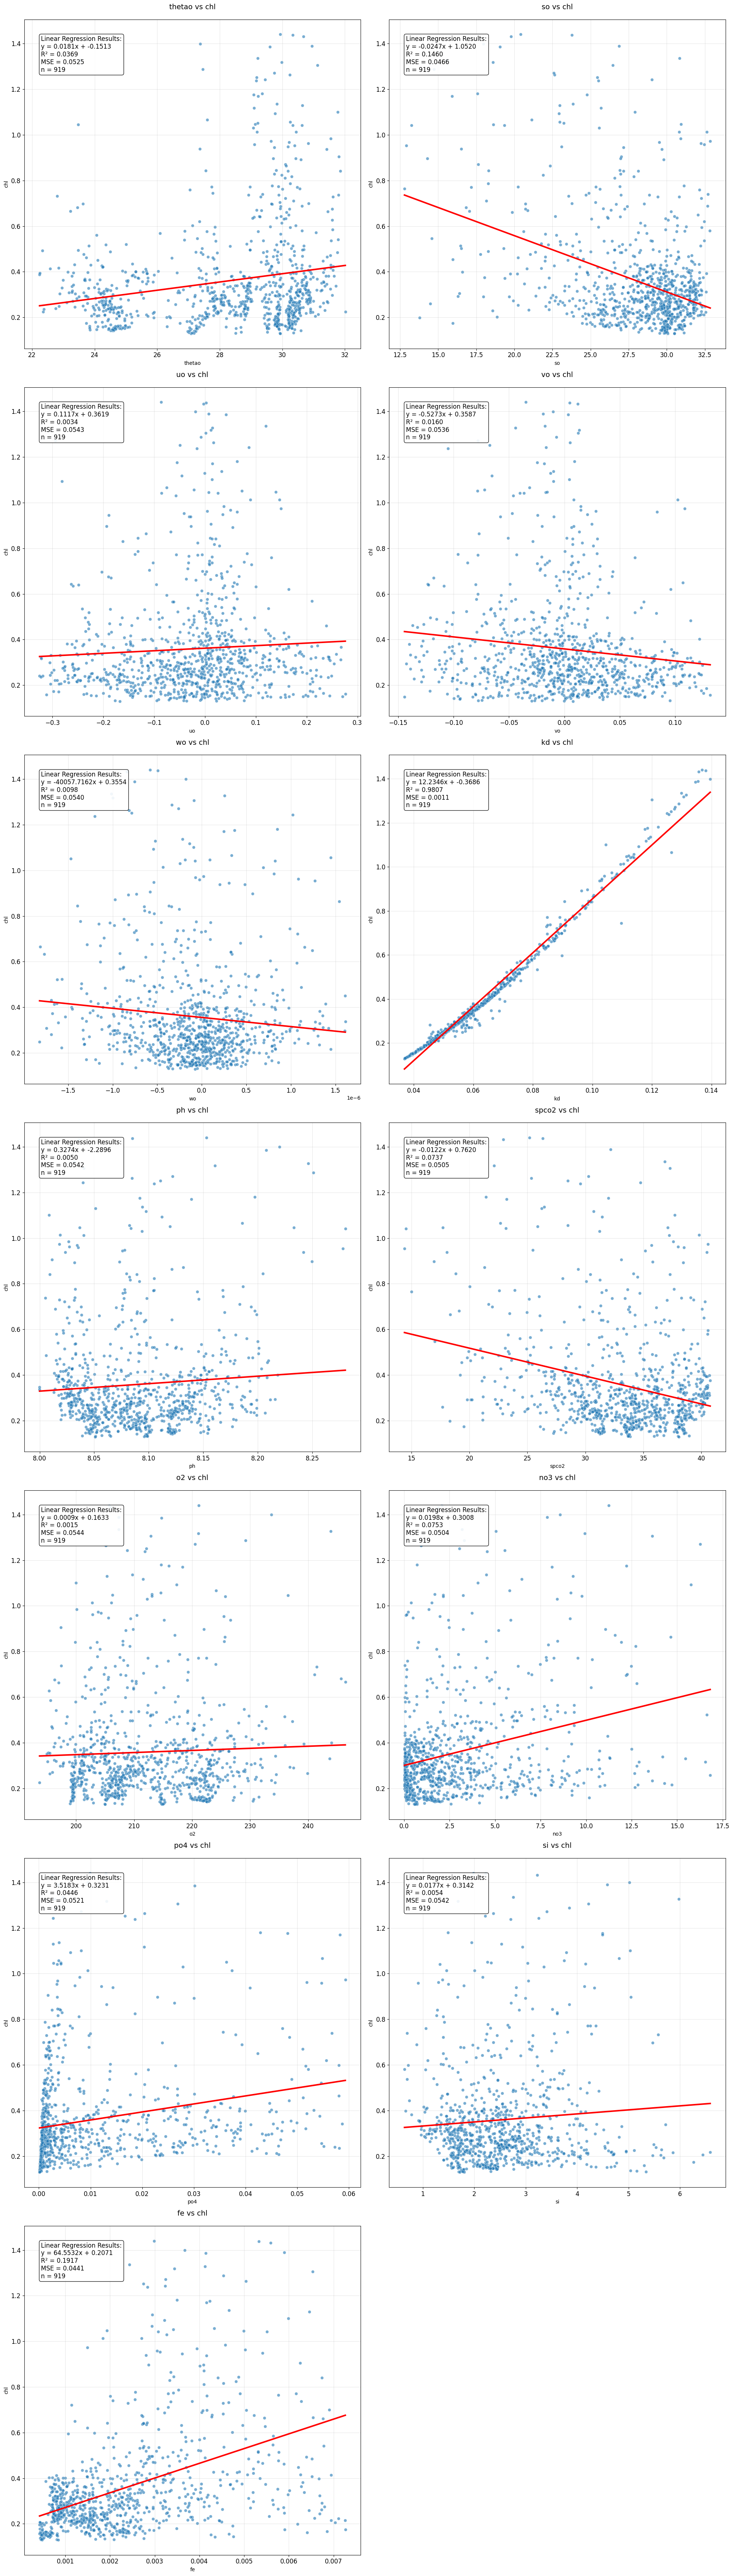

,Feature,Coefficient,Intercept,R²,MSE,Sample Size
0,thetao,0.0181,-0.1513,0.0369,0.0525,919
1,so,-0.0247,1.0520,0.1460,0.0466,919
2,uo,0.1117,0.3619,0.0034,0.0543,919
3,vo,-0.5273,0.3587,0.0160,0.0536,919
4,wo,-40057.7162,0.3554,0.0098,0.0540,919
5,kd,12.2346,-0.3686,0.9807,0.0011,919
6,ph,0.3274,-2.2896,0.0050,0.0542,919
7,spco2,-0.0122,0.7620,0.0737,0.0505,919
8,o2,0.0009,0.1633,0.0015,0.0544,919
9,no3,0.0198,0.3008,0.0753,0.0504,919


In [4]:
def plot_single_relationships(data, target, features, n_cols=2):
    """Plot scatter plots of target vs each feature with univariate best fit line and return regression details"""
    n_features = len(features)
    n_rows = int(np.ceil(n_features / n_cols))
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 10*n_rows))
    axes = axes.ravel()
    
    # Create a list to store regression details
    regression_details = []
    
    for idx, feature in enumerate(features):
        # ... existing scatter plot code ...
        clean_data = data.dropna(subset=[feature, target])
        sns.scatterplot(data=clean_data, x=feature, y=target, ax=axes[idx], alpha=0.6)
        
        # ... existing regression code ...
        X = clean_data[feature].values.reshape(-1, 1)
        y = clean_data[target].values
        reg = LinearRegression().fit(X, y)
        y_pred = reg.predict(X)
        r2 = r2_score(y, y_pred)
        mse = mean_squared_error(y, y_pred)
        
        # Store regression details
        regression_details.append({
            'Feature': feature,
            'Coefficient': reg.coef_[0],
            'Intercept': reg.intercept_,
            'R²': r2,
            'MSE': mse,
            'Sample Size': len(clean_data)
        })
        
        # ... rest of the plotting code remains the same ...
        x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
        y_pred_line = reg.predict(x_range)
        axes[idx].plot(x_range, y_pred_line, color='red', linewidth=3, label='Best fit line')
        
        text = f'Linear Regression Results:\n'
        text += f'y = {reg.coef_[0]:.4f}x + {reg.intercept_:.4f}\n'
        text += f'R² = {r2:.4f}\n'
        text += f'MSE = {mse:.4f}\n'
        text += f'n = {len(clean_data)}'
        axes[idx].text(0.05, 0.95, text, transform=axes[idx].transAxes,
                      verticalalignment='top', fontsize=12,
                      bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))
        
        axes[idx].set_title(f'{feature} vs {target}', fontsize=14, pad=20)
        axes[idx].tick_params(labelsize=12)
        axes[idx].grid(True, alpha=0.3)
    
    # Hide empty subplots if any
    for idx in range(n_features, len(axes)):
        axes[idx].set_visible(False)
        
    plt.tight_layout()
    plt.show()
    
    # Create and return DataFrame with regression details
    regression_df = pd.DataFrame(regression_details)
    # Round numeric columns
    numeric_columns = ['Coefficient', 'Intercept', 'R²', 'MSE']
    regression_df[numeric_columns] = regression_df[numeric_columns].round(4)
    
    # Display the table
    display(regression_df)
    
    return regression_df

# Plot relationships and get regression details
regression_results = plot_single_relationships(data, target, features)

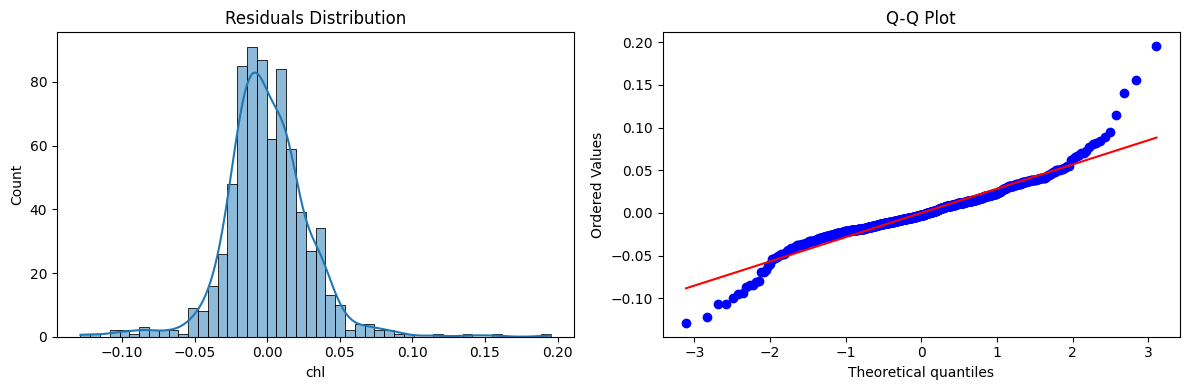

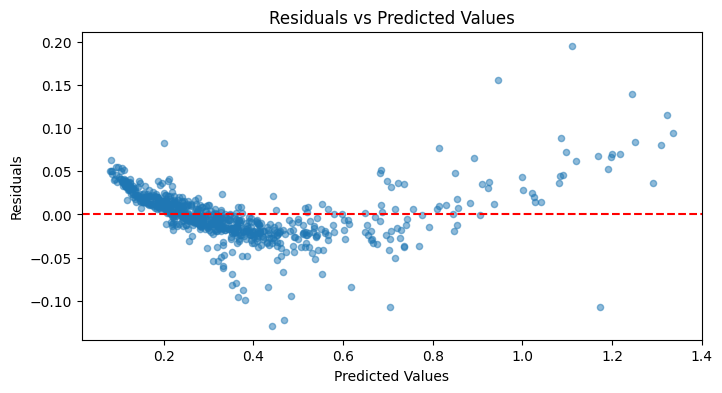


Variance Inflation Factors:
   Variable           VIF
6        ph  20022.587489
8        o2   7862.177365
0    thetao   2854.692944
1        so   1441.877922
7     spco2   1150.199444
5        kd     23.568953
11       si     19.149579
12       fe      6.332850
9       no3      6.038035
10      po4      2.365499
2        uo      1.410715
3        vo      1.098789
4        wo      1.088746


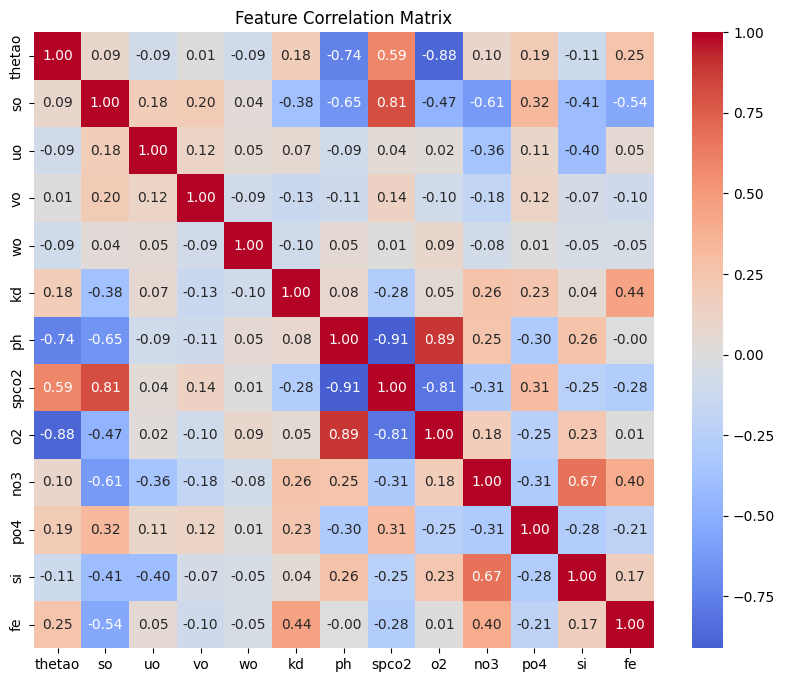

In [5]:
# Check Linear Regression Assumptions (excluding linearity)
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.linear_model import LinearRegression, HuberRegressor
from sklearn.metrics import r2_score, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Prepare data for multivariate analysis
X = data[features].dropna()
y = data[target][X.index]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit initial model for residual analysis
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_train)
residuals = y_train - y_pred

# 2. Normality of Residuals
plt.figure(figsize=(12, 4))
plt.subplot(121)
sns.histplot(residuals, kde=True)
plt.title('Residuals Distribution')
plt.subplot(122)
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.tight_layout()
plt.show()

# 3. Homoscedasticity (with smaller plot)
plt.figure(figsize=(8, 4))
plt.scatter(y_pred, residuals, alpha=0.5, s=20)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()

# 4. Multicollinearity Check
# Calculate and print VIF values first
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nVariance Inflation Factors:")
print(vif_data.sort_values('VIF', ascending=False))

# Then show correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()

In [6]:
import statsmodels.api as sm
from sklearn.metrics import r2_score

# Adding a constant to the data for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fitting a linear regression model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Printing the summary of the linear regression model
print(results.summary())

# Making predictions with the linear regression model
predictions = results.predict(X_test_sm)

# Calculating R^2 for Linear Regression
r2 = r2_score(y_test, predictions)
print(f"\nR^2 Score for Linear Regression: {r2:.4f}")

                            OLS Regression Results                            
Dep. Variable:                    chl   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     3264.
Date:                Fri, 04 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:12:03   Log-Likelihood:                 1549.3
No. Observations:                 735   AIC:                            -3071.
Df Residuals:                     721   BIC:                            -3006.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6985      0.782      3.449      0.0

In [7]:
# Robust Regression (Huber)
# Adding a constant to the data for the intercept term
X_train_sm = sm.add_constant(X_train)
X_test_sm = sm.add_constant(X_test)

# Fitting a robust linear regression model using Huber's T norm
robust_model = sm.RLM(y_train, X_train_sm, M=sm.robust.norms.HuberT())
robust_results = robust_model.fit()

# Print model summary
print("\nRobust Regression (Huber) Results:")
print(robust_results.summary())

# Make predictions
robust_predictions = robust_results.predict(X_test_sm)

# Calculate and print R^2 score
robust_r2 = r2_score(y_test, robust_predictions)
print(f"\nR^2 Score for Robust Linear Regression: {robust_r2:.4f}")


Robust Regression (Huber) Results:
                    Robust linear Model Regression Results                    
Dep. Variable:                    chl   No. Observations:                  735
Model:                            RLM   Df Residuals:                      721
Method:                          IRLS   Df Model:                           13
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Fri, 04 Apr 2025                                         
Time:                        15:12:03                                         
No. Iterations:                    50                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1

In [8]:
import pickle
import os

# Define absolute path to models directory
models_dir = '/Users/arup/Documents/ISRO-Project/models'

# Save the robust regression model
robust_model_path = os.path.join(models_dir, 'robust_regression_model.pkl')
with open(robust_model_path, 'wb') as f:
    pickle.dump(robust_results, f)

print(f"Robust regression model saved to {robust_model_path}")

# Save the standard OLS model as well
linear_model_path = os.path.join(models_dir, 'linear_regression_model.pkl')
with open(linear_model_path, 'wb') as f:
    pickle.dump(results, f)

print(f"Linear regression model saved to {linear_model_path}")

Robust regression model saved to /Users/arup/Documents/ISRO-Project/models/robust_regression_model.pkl
Linear regression model saved to /Users/arup/Documents/ISRO-Project/models/linear_regression_model.pkl


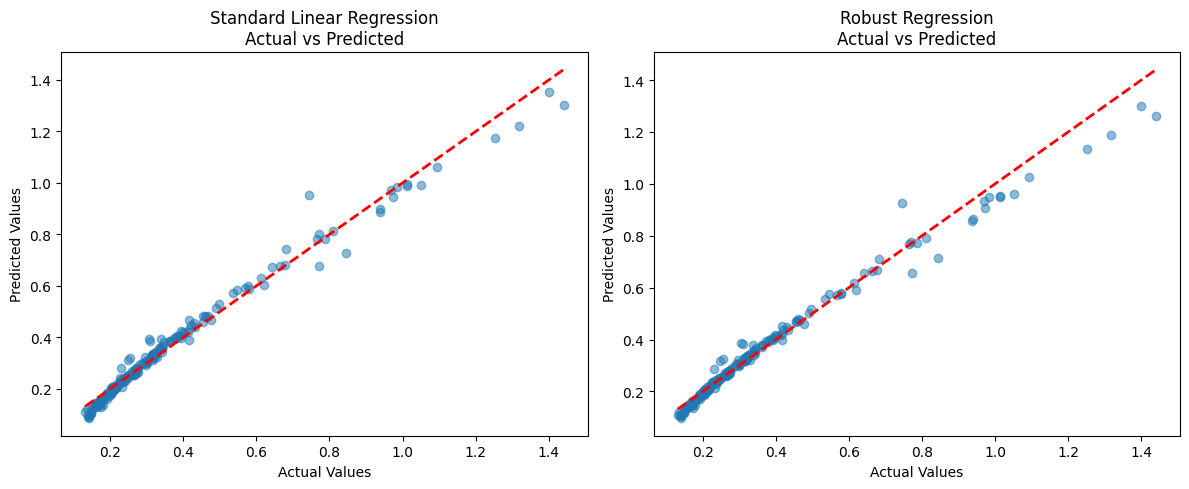

In [9]:
# Visualize actual vs predicted values
plt.figure(figsize=(12, 5))

plt.subplot(121)
plt.scatter(y_test, predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Standard Linear Regression\nActual vs Predicted')

plt.subplot(122)
plt.scatter(y_test, robust_predictions, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Robust Regression\nActual vs Predicted')

plt.tight_layout()
plt.show()